In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
import seaborn as sns
from datetime import datetime

warnings.filterwarnings('ignore')
font_name = matplotlib.font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
krfont = {'family':font_name, 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

##### 1. 육류 가격 불러오기 

In [2]:
MeatPrice = pd.read_excel('./Downloads/MeatPrice_180609.xlsx', converters={'기간':str, '품목코드':str})
MeatPrice['기간'] = pd.to_datetime([datetime.strptime(MeatPrice['기간'][i], '%Y.%m') for i in range(len(MeatPrice))])
MeatPrice = MeatPrice.query('국가명 == "미국" or 국가명 == "호주"')
MeatPrice = MeatPrice.query('품목코드 == "0201" or 품목코드 == "0202"').drop(['수출중량','수출금액'], axis=1).eval('단위수입금액 = 수입금액/수입중량*1000')

##### 2. 국가별/품목별 단위수입금액 분포

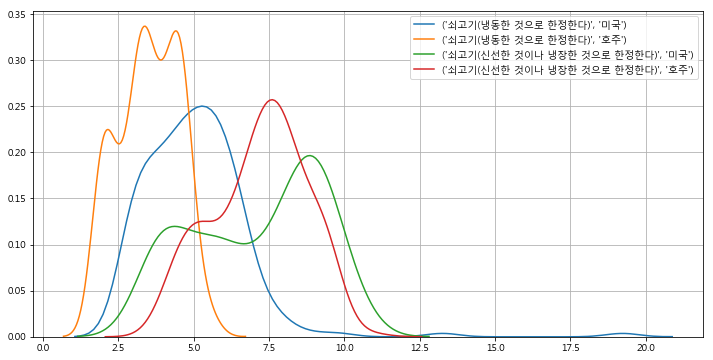

In [3]:
plt.figure(figsize=(12,6))
groups = MeatPrice.groupby(['품목명', '국가명'])

for k, v in groups:
    sns.kdeplot(v['단위수입금액'], label=str(k))
    
plt.grid(True)
plt.legend()
plt.show()

##### 3. 품목별/국가별 단위수입금액 시계열

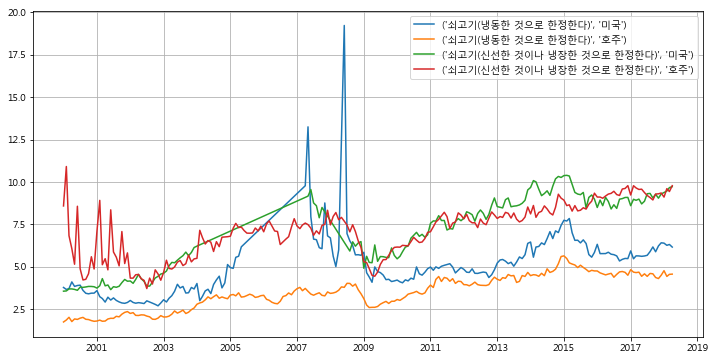

In [4]:
plt.figure(figsize=(12,6))
groups = MeatPrice.groupby(['품목명', '국가명'])

for k, v in groups:
    plt.plot(v['기간'], v['단위수입금액'], label=str(k))
    
plt.grid(True)
plt.legend()
plt.show()

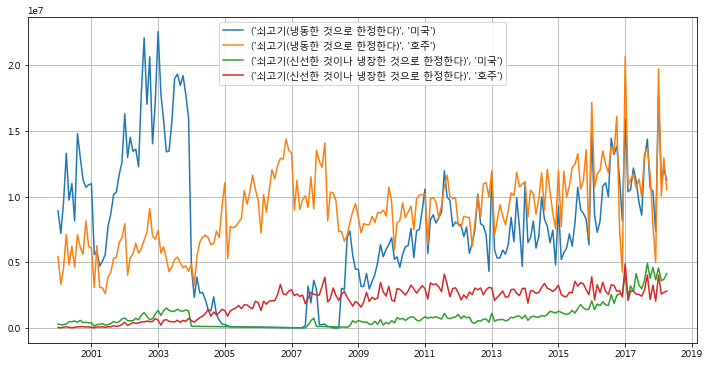

In [5]:
plt.figure(figsize=(12,6))
groups = MeatPrice.groupby(['품목명', '국가명'])

for k, v in groups:
    plt.plot(v['기간'], v['수입중량'], label=str(k))
    
plt.grid(True)
plt.legend()
plt.show()

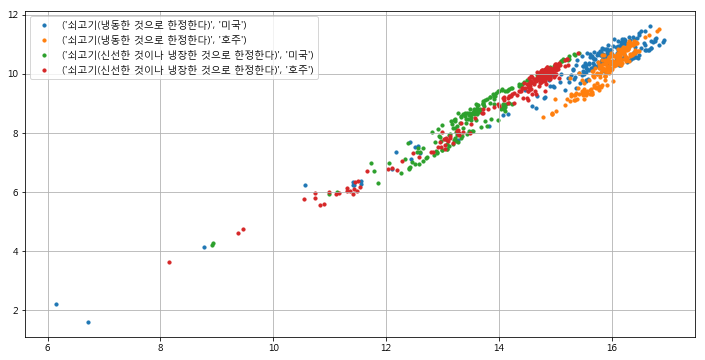

In [11]:
plt.figure(figsize=(12,6))
groups = MeatPrice.groupby(['품목명', '국가명'])

for k, v in groups:
    plt.scatter(np.log(v['수입중량']), np.log(v['수입금액']), label=str(k), s=10)
    
plt.grid(True)
plt.legend()
plt.show()

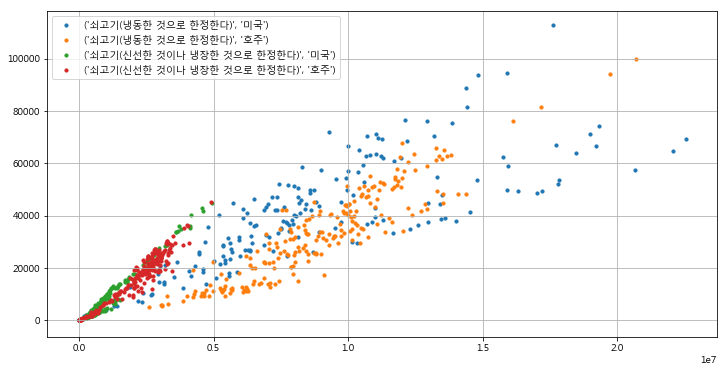

In [13]:
plt.figure(figsize=(12,6))
groups = MeatPrice.groupby(['품목명', '국가명'])

for k, v in groups:
    plt.scatter(v['수입중량'], v['수입금액'], label=str(k), s=10)
    
plt.grid(True)
plt.legend()
plt.show()